주제 : 온라인 학습 플랫폼 사용자 행동 패턴 분석
개요 :
이번 프로젝트는 학습 서비스를 이용하는 독자들 중 누가 서비스 구독을 연장할지 예측하기 위한 사전 파악에 초점을 맞추고 있습니다. 우리의 목표는 유저들의 학습 습관, 선호도, 이용 행태 등 다양한 측면을 면밀히 분석하는 것입니다.


이를 위해, 우리는 유저들의 학습 패턴, 서비스 이용 시간, 콘텐츠에 대한 반응, 그리고 이들이 얼마나 자주 서비스를 이용하는지 등 다양한 데이터를 수집하고 분석할 계획입니다. 이 데이터는 유저들이 서비스에 얼마나 만족하고 있는지, 어떤 요소들이 그들의 구독 결정에 영향을 미치는지 이해하는 데 중요한 역할을 할 것입니다.
데이터셋 : mini.csv
메타데이터
user_id: 사용자의 고유 식별자
subscription_duration: 사용자가 서비스에 가입한 기간 (월)
recent_login_time: 사용자가 마지막으로 로그인한 시간 (일)
average_login_time: 사용자의 일반적인 로그인 시간
average_time_per_learning_session: 각 학습 세션에 소요된 평균 시간 (분)
monthly_active_learning_days: 월간 활동적인 학습 일수
total_completed_courses: 완료한 총 코스 수
recent_learning_achievement: 최근 학습 성취도
abandoned_learning_sessions: 중단된 학습 세션 수
community_engagement_level: 커뮤니티 참여도
preferred_difficulty_level: 선호하는 난이도
subscription_type: 구독 유형
customer_inquiry_history: 고객 문의 이력
payment_pattern : 사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.
7: 3개월 모두 결제함
6: 첫 2개월은 결제했으나 마지막 달에는 결제하지 않음
5: 첫 달과 마지막 달에 결제함
4: 첫 달에만 결제함
3: 마지막 2개월에 결제함
2: 가운데 달에만 결제함
1: 마지막 달에만 결제함
0: 3개월 동안 결제하지 않음
target: 사용자가 다음 달에도 구독을 계속할지 (1) 또는 취소할지 (0)를 나타냄

In [81]:
import pandas as pd
access_data = pd.read_table('data/mini.csv',sep=',')

In [82]:
access_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

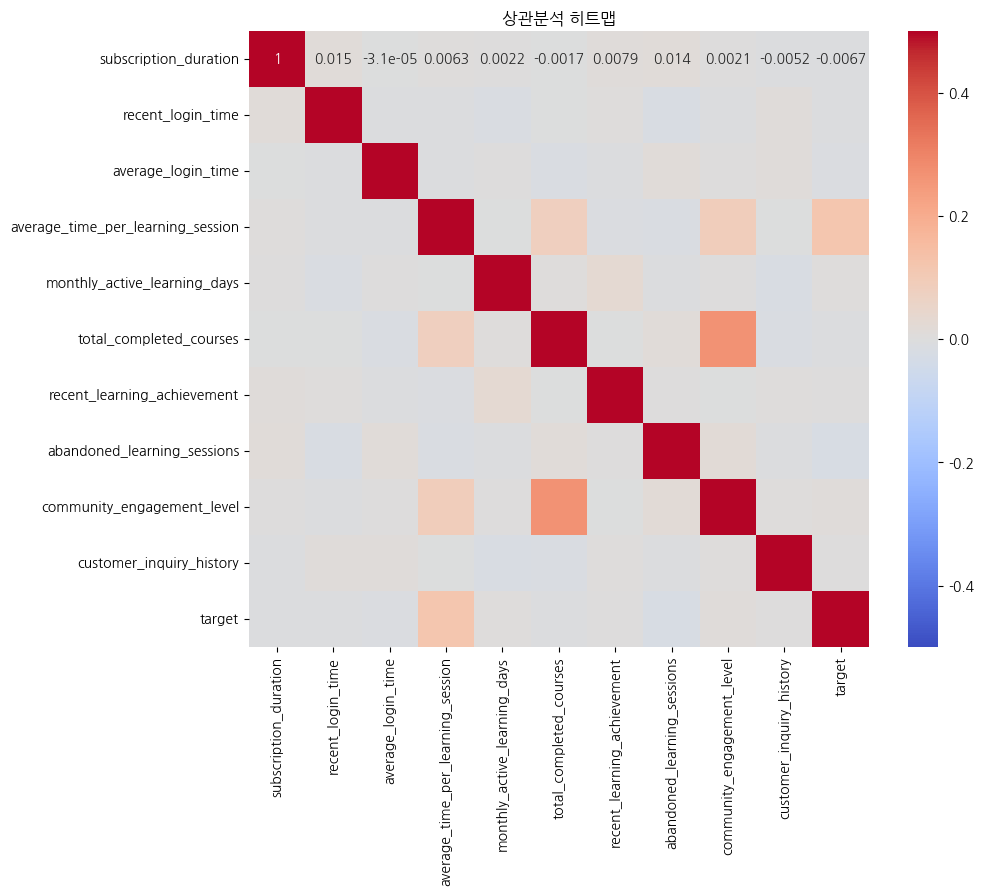

In [84]:
access_data2 = access_data.drop(columns=['user_id','preferred_difficulty_level','subscription_type','payment_pattern'])
correlation_matrix = access_data2.corr()
correlation_matrix
# mask = correlation_matrix <= -0.019
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-0.5, vmax=0.5,) # mask=mask)
plt.title('상관분석 히트맵')
plt.show()

In [65]:
access_data.describe(include='all')

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
count,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000
unique,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,b919c29d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,Basic,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4992,5979,NaN,NaN,NaN
mean,NaN,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,NaN,NaN,2.010500,3.502900,0.619900
std,NaN,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,NaN,NaN,1.420983,2.311261,0.485435
min,NaN,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,NaN,NaN,1.000000,1.000000,0.000000
50%,NaN,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,NaN,NaN,2.000000,4.000000,1.000000
75%,NaN,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,NaN,NaN,3.000000,6.000000,1.000000


In [83]:
access_data.head()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1


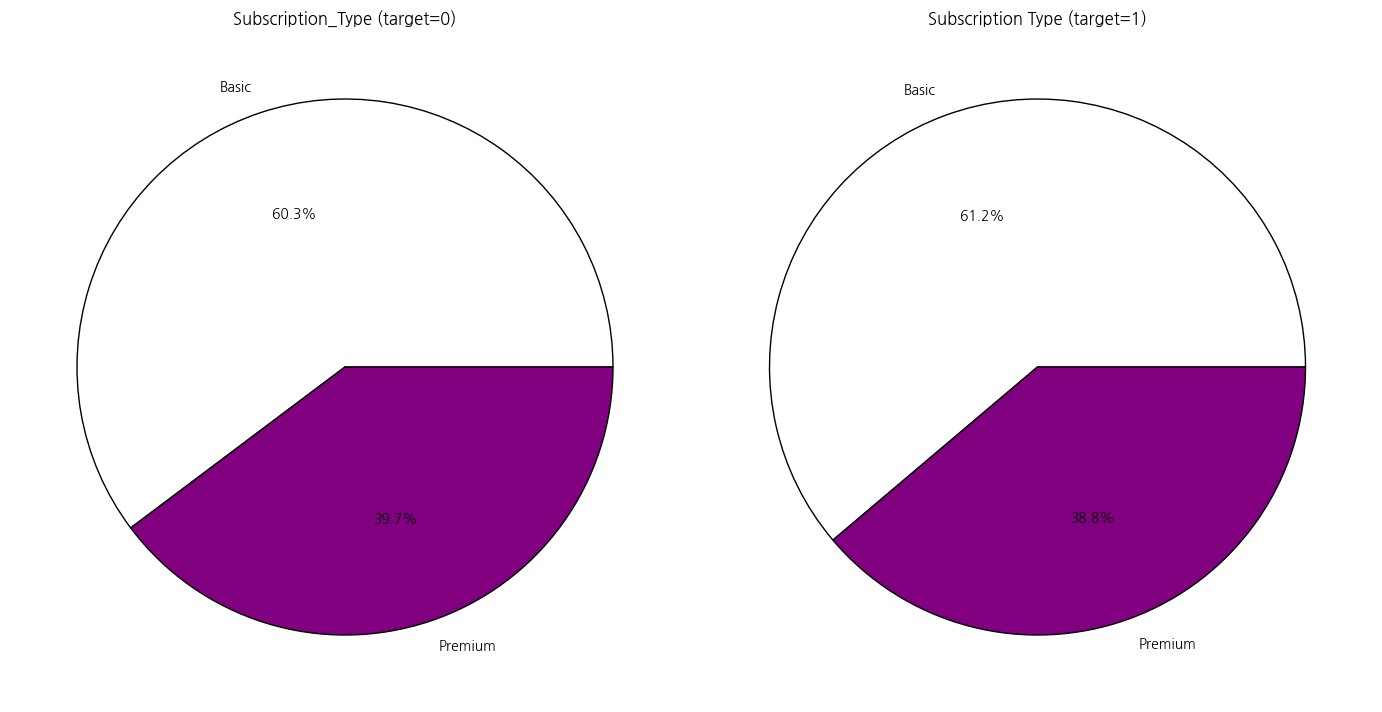

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 예시 데이터프레임 생성 (여기서는 이미 access_data 데이터프레임이 있다고 가정)
np.random.seed(42)
data = {
    'subscription_duration': np.random.randint(1, 24, size=10000),
    'average_login_time': np.random.randint(1, 30, size=10000),
    'average_time_per_learning_session': np.random.randint(1, 60, size=10000),
    'monthly_active_learning_days': np.random.randint(1, 25, size=10000),
    'total_completed_courses': np.random.randint(1, 30, size=10000),
    'subscription_type': np.random.choice(['Basic', 'Premium'], size=10000, p=[0.6, 0.4]),
    'target': np.random.choice([0, 1], size=10000, p=[0.38, 0.62])
}

access_data = pd.DataFrame(data)

# target 값에 따라 데이터 분리
t1 = access_data[access_data['target'] == 1]
t0 = access_data[access_data['target'] == 0]

# subscription_type의 분포 계산
t1_subscription_counts = t1['subscription_type'].value_counts()
t0_subscription_counts = t0['subscription_type'].value_counts()

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# 공통 wedgeprops 설정
wedgeprops = {'edgecolor': 'black'}

# t0의 subscription_type 원형 그래프
axes[0].pie(t0_subscription_counts, labels=t0_subscription_counts.index, autopct='%1.1f%%', colors=['white', 'purple'], wedgeprops=wedgeprops)
axes[0].set_title('Subscription_Type (target=0)')

# t1의 subscription_type 원형 그래프
axes[1].pie(t1_subscription_counts, labels=t1_subscription_counts.index, autopct='%1.1f%%', colors=['white', 'purple'], wedgeprops=wedgeprops)
axes[1].set_title('Subscription Type (target=1)')

plt.tight_layout()
plt.show()


In [35]:
t1

,subscription_duration,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,subscription_type,target
0,7,28,15,11,9,Basic,1
1,20,23,54,10,12,Basic,1
3,11,1,15,9,24,Basic,1
5,21,15,50,24,14,Premium,1
7,19,15,22,7,18,Basic,1
...,...,...,...,...,...,...,...
9993,17,9,49,17,23,Basic,1
9995,22,22,58,16,6,Basic,1
9996,1,4,16,2,23,Premium,1
9997,12,1,28,7,7,Premium,1


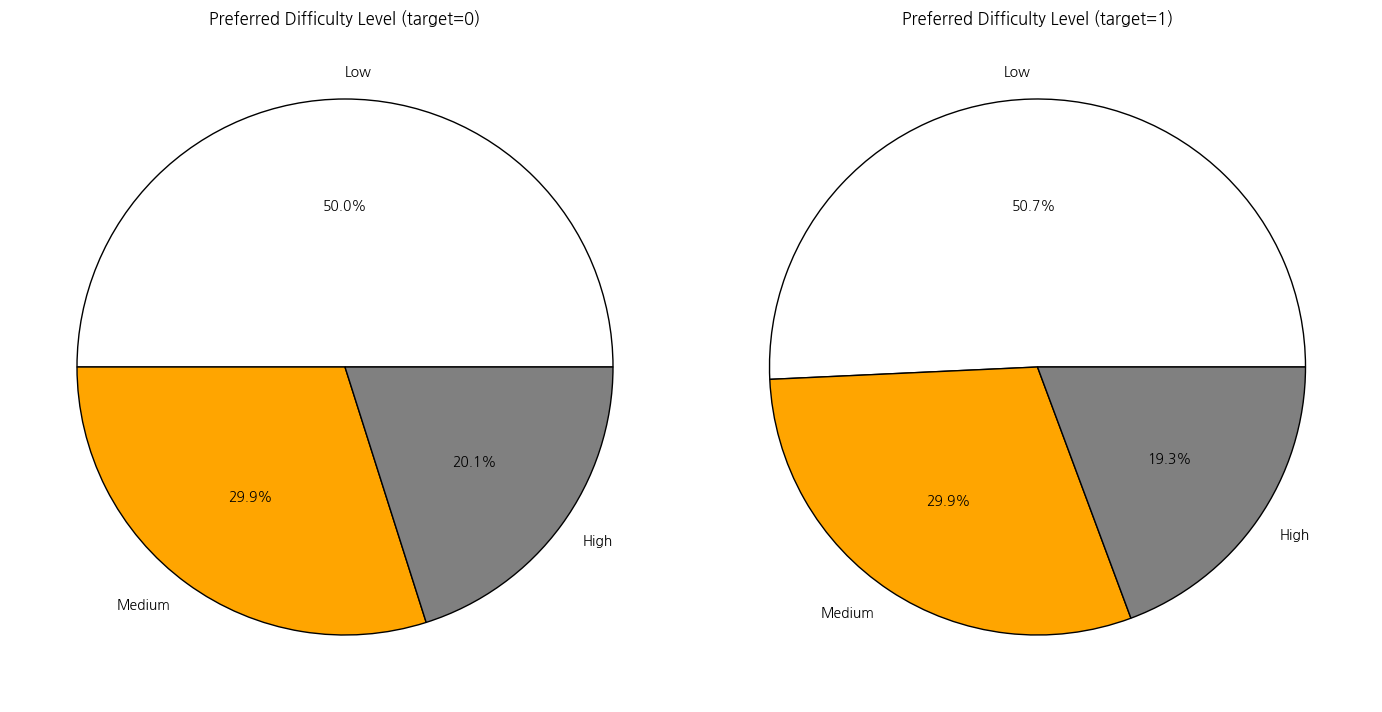

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 예시 데이터프레임 생성 (여기서는 이미 access_data 데이터프레임이 있다고 가정)
np.random.seed(42)
data = {
    'subscription_duration': np.random.randint(1, 24, size=10000),
    'average_login_time': np.random.randint(1, 30, size=10000),
    'average_time_per_learning_session': np.random.randint(1, 60, size=10000),
    'monthly_active_learning_days': np.random.randint(1, 25, size=10000),
    'total_completed_courses': np.random.randint(1, 30, size=10000),
    'preferred_difficulty_level': np.random.choice(['Low', 'Medium', 'High'], size=10000, p=[0.5, 0.3, 0.2]),
    'target': np.random.choice([0, 1], size=10000, p=[0.38, 0.62])
}

access_data = pd.DataFrame(data)

# target 값에 따라 데이터 분리
t1 = access_data[access_data['target'] == 1]
t0 = access_data[access_data['target'] == 0]

# preferred_difficulty_level의 분포 계산
t1_difficulty_counts = t1['preferred_difficulty_level'].value_counts()
t0_difficulty_counts = t0['preferred_difficulty_level'].value_counts()

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# 공통 wedgeprops 설정
wedgeprops = {'edgecolor': 'black'}

# t0의 preferred_difficulty_level 원형 그래프
axes[0].pie(t0_difficulty_counts, labels=t0_difficulty_counts.index, autopct='%1.1f%%', colors=['white', 'orange', 'grey'], wedgeprops=wedgeprops)
axes[0].set_title('Preferred Difficulty Level (target=0)')

# t1의 preferred_difficulty_level 원형 그래프
axes[1].pie(t1_difficulty_counts, labels=t1_difficulty_counts.index, autopct='%1.1f%%', colors=['white', 'orange', 'grey'], wedgeprops=wedgeprops)
axes[1].set_title('Preferred Difficulty Level (target=1)')

plt.tight_layout()
plt.show()

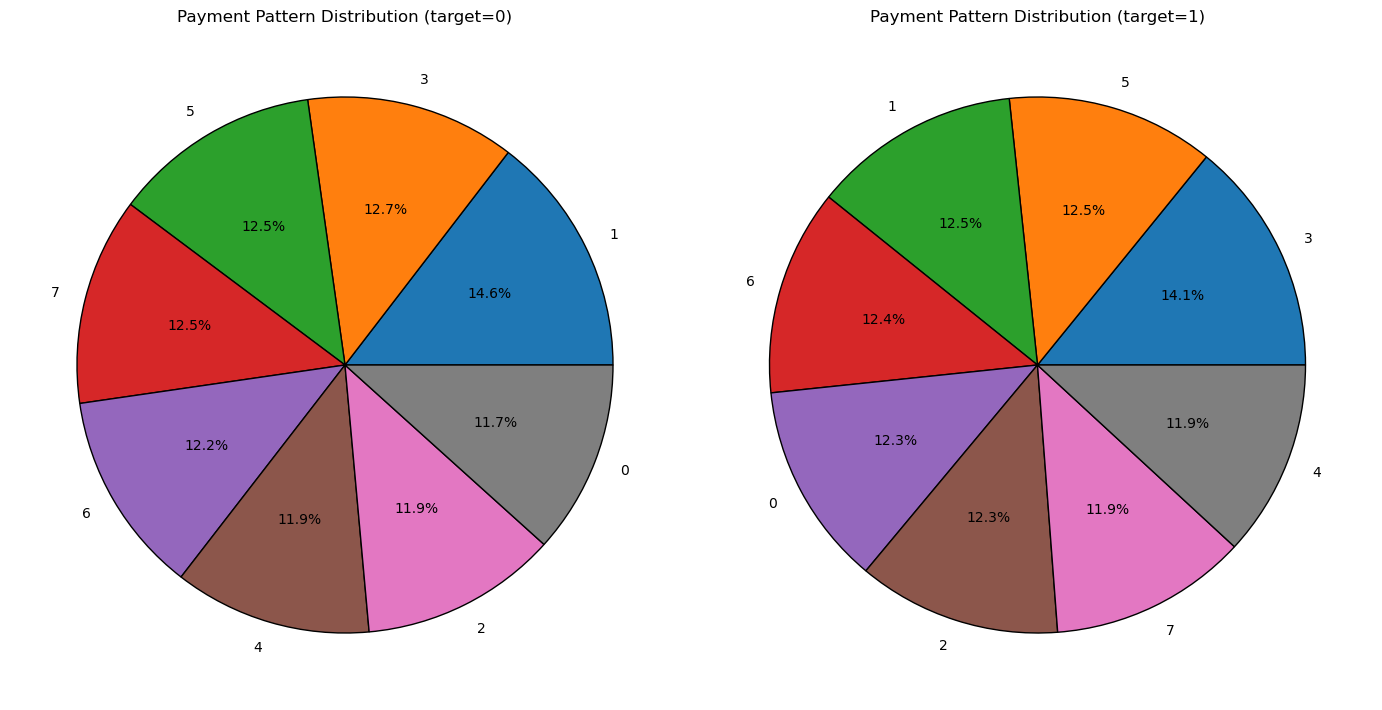

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 예시 데이터프레임 생성 (여기서는 이미 access_data 데이터프레임이 있다고 가정)
np.random.seed(42)
data = {
    'subscription_duration': np.random.randint(1, 24, size=10000),
    'average_login_time': np.random.randint(1, 30, size=10000),
    'average_time_per_learning_session': np.random.randint(1, 60, size=10000),
    'monthly_active_learning_days': np.random.randint(1, 25, size=10000),
    'total_completed_courses': np.random.randint(1, 30, size=10000),
    'payment_pattern': np.random.randint(0, 8, size=10000),
    'target': np.random.choice([0, 1], size=10000, p=[0.38, 0.62])
}

access_data = pd.DataFrame(data)

# target 값에 따라 데이터 분리
t1 = access_data[access_data['target'] == 1]
t0 = access_data[access_data['target'] == 0]

# payment_pattern의 분포 계산
t1_payment_counts = t1['payment_pattern'].value_counts()
t0_payment_counts = t0['payment_pattern'].value_counts()

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# 공통 wedgeprops 설정
wedgeprops = {'edgecolor': 'black'}

# t0의 payment_pattern 원형 그래프
axes[0].pie(t0_payment_counts, labels=t0_payment_counts.index, autopct='%1.1f%%', wedgeprops=wedgeprops)
axes[0].set_title('Payment Pattern Distribution (target=0)')

# t1의 payment_pattern 원형 그래프
axes[1].pie(t1_payment_counts, labels=t1_payment_counts.index, autopct='%1.1f%%', wedgeprops=wedgeprops)
axes[1].set_title('Payment Pattern Distribution (target=1)')

plt.tight_layout()
plt.show()


In [4]:
t1=access_data[access_data['target'] == 1]
t1.describe()

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,customer_inquiry_history,payment_pattern,target
count,6199.00000,6199.000000,6199.000000,6199.000000,6199.000000,6199.000000,6199.000000,6199.000000,6199.000000,6199.000000,6199.000000,6199.0
mean,11.86272,14.985804,14.974035,60.105533,12.571866,12.216003,75.047419,3.016616,3.895628,2.010808,3.500403,1.0
std,6.59050,8.322310,3.029275,63.477523,6.980077,3.636558,10.027058,1.754416,1.264061,1.428306,2.316925,0.0
min,1.00000,1.000000,2.366189,0.013535,1.000000,2.000000,36.115562,0.000000,1.000000,0.000000,0.000000,1.0
25%,6.00000,8.000000,12.976618,15.908562,7.000000,10.000000,68.249866,2.000000,3.000000,1.000000,1.000000,1.0
50%,12.00000,15.000000,14.979217,39.705116,12.000000,12.000000,75.199591,3.000000,4.000000,2.000000,3.000000,1.0
75%,18.00000,22.000000,16.964874,80.159683,19.000000,15.000000,81.867694,4.000000,5.000000,3.000000,6.000000,1.0
max,23.00000,29.000000,26.284396,503.372616,24.000000,27.000000,112.643828,12.000000,5.000000,8.000000,7.000000,1.0


In [5]:
t0=access_data[access_data['target'] == 0]
t0.describe()

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,customer_inquiry_history,payment_pattern,target
count,3801.000000,3801.00000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.0
mean,11.953959,15.05788,15.026762,46.456986,12.502236,12.246251,75.000310,3.087609,3.870560,2.009997,3.506972,0.0
std,6.618295,8.42873,2.956732,39.639733,6.854200,3.630554,9.873574,1.755430,1.259105,1.409145,2.302291,0.0
min,1.000000,1.00000,3.636424,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,0.000000,0.000000,0.0
25%,6.000000,8.00000,13.077376,14.485582,7.000000,10.000000,68.316764,2.000000,3.000000,1.000000,1.000000,0.0
50%,12.000000,15.00000,14.979239,34.773346,13.000000,12.000000,74.981448,3.000000,4.000000,2.000000,4.000000,0.0
75%,18.000000,22.00000,17.030607,68.298309,18.000000,15.000000,81.520614,4.000000,5.000000,3.000000,6.000000,0.0
max,23.000000,29.00000,26.998490,179.176060,24.000000,27.000000,107.135153,11.000000,5.000000,10.000000,7.000000,0.0


In [6]:
t1.head()
t0.head()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
5,b7586b82,4,4,17.274007,34.034189,21,8,74.371028,2,4,High,Basic,5,7,0
10,594da7eb,19,21,13.953449,135.256834,13,11,76.414481,0,4,High,Basic,2,1,0
11,b8696d56,5,28,18.474545,117.134599,9,9,97.786237,6,3,Medium,Premium,2,3,0
14,aba89783,2,27,10.303337,2.712124,20,8,82.491912,4,5,Low,Basic,4,6,0


In [ ]:
t0 = access_data[access_data['target'] == 0].
t1 = access_data[access_data['target'] == 1]

In [42]:
# t0과 t1으로 데이터 나누기
t0 = access_data[access_data['target'] == 0].copy()
t1 = access_data[access_data['target'] == 1].copy()

# total_completed_courses 값을 구간으로 나누기
bins = [0, 5, 10, 15, 20, 25, 30]
t0['completed_courses_bin'] = pd.cut(t0['total_completed_courses'], bins)
t1['completed_courses_bin'] = pd.cut(t1['total_completed_courses'], bins)

# 각 구간별로 인원수 계산
t0_counts = t0['completed_courses_bin'].value_counts().sort_index()
t1_counts = t1['completed_courses_bin'].value_counts().sort_index()

# 각 구간별 비율 계산
t0_ratio = t0_counts / len(t0)
t1_ratio = t1_counts / len(t1)

# 데이터프레임으로 변환
ratio_df = pd.DataFrame({'t0_ratio': t0_ratio, 't1_ratio': t1_ratio}).reset_index()

C:\Users\dlftk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


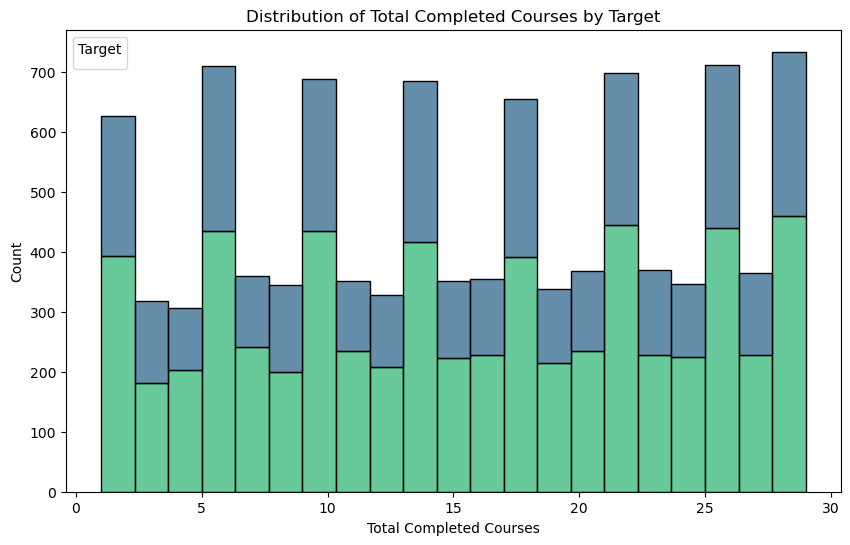

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(data=access_data, x='total_completed_courses', hue='target', multiple='stack', palette='viridis')
plt.title('Distribution of Total Completed Courses by Target')
plt.xlabel('Total Completed Courses')
plt.ylabel('Count')
plt.legend(title='Target')
plt.show()

In [50]:
pip install koreanize-matplotlib

Note: you may need to restart the kernel to use updated packages.


In [52]:
import koreanize_matplotlib

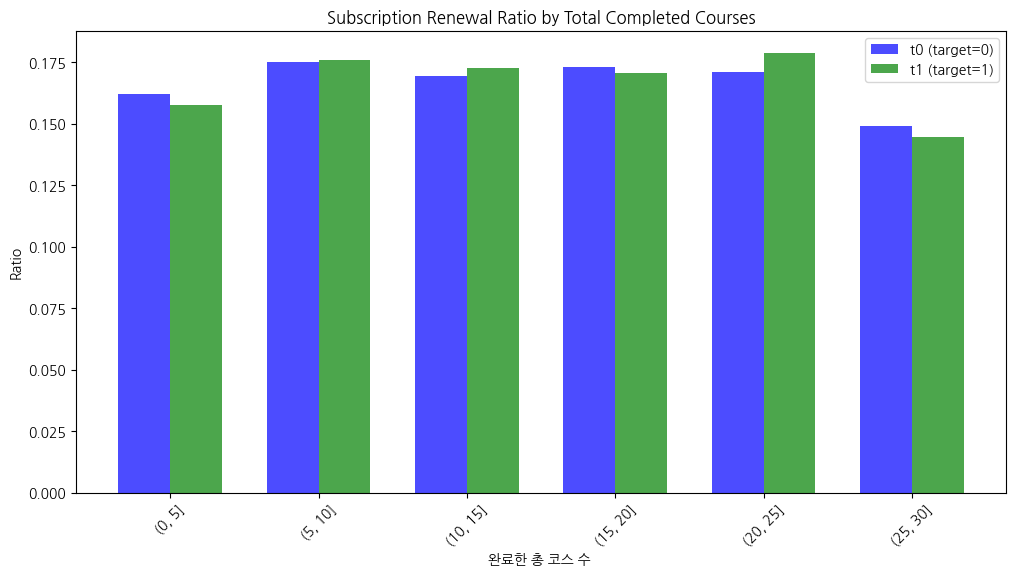

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 샘플 데이터프레임 생성 (여기서는 실제 데이터프레임을 사용합니다)

# t0과 t1으로 데이터 나누기
t0 = access_data[access_data['target'] == 0].copy()
t1 = access_data[access_data['target'] == 1].copy()

# total_completed_courses 값을 구간으로 나누기
bins = [0, 5, 10, 15, 20, 25, 30]
labels = ["0~5", "5~10", "10~15", "15~20", "20~25", "25~30"]
t0['completed_courses_bin'] = pd.cut(t0['total_completed_courses'], bins)
t1['completed_courses_bin'] = pd.cut(t1['total_completed_courses'], bins)

# 각 구간별로 인원수 계산
t0_counts = t0['completed_courses_bin'].value_counts().sort_index()
t1_counts = t1['completed_courses_bin'].value_counts().sort_index()

# 각 구간별 비율 계산
t0_ratio = t0_counts / len(t0)
t1_ratio = t1_counts / len(t1)

# 데이터프레임으로 변환
ratio_df = pd.DataFrame({'t0_ratio': t0_ratio, 't1_ratio': t1_ratio}).reset_index()

# 그래프 그리기
plt.figure(figsize=(12, 6))

# 막대 위치 지정
bar_width = 0.35
index = np.arange(len(ratio_df))

# t0 그룹 막대
plt.bar(index, ratio_df['t0_ratio'], bar_width, color='blue', alpha=0.7, label='t0 (target=0)')

# t1 그룹 막대
plt.bar(index + bar_width, ratio_df['t1_ratio'], bar_width, color='green', alpha=0.7, label='t1 (target=1)')

# 그래프 제목과 축 라벨 설정
plt.title('Subscription Renewal Ratio by Total Completed Courses')
plt.xlabel('완료한 총 코스 수 ')
plt.ylabel('Ratio')

# x축 눈금과 레이블 설정
plt.xticks(index + bar_width / 2, ratio_df['completed_courses_bin'].astype(str), rotation=45)

# 범례 추가
plt.legend()


# 그래프 보이기
plt.show()


In [47]:
t0.total_completed_courses

2       29
4        1
6       11
10      15
14      14
        ..
9976     5
9988    16
9989    18
9994    19
9999     5
Name: total_completed_courses, Length: 3746, dtype: int32

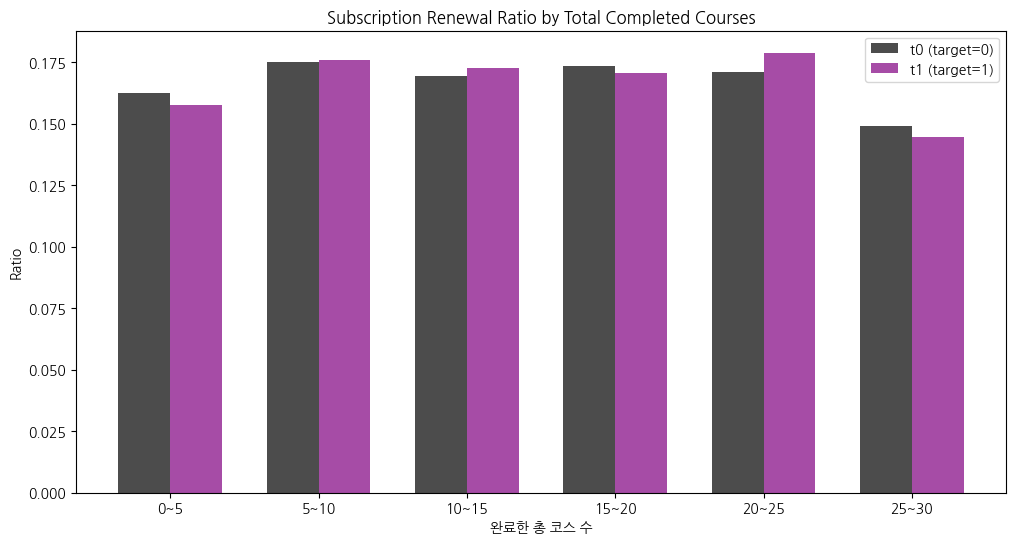

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 나누기
t0 = access_data[access_data['target'] == 0].copy()
t1 = access_data[access_data['target'] == 1].copy()

# total_completed_courses 값을 구간으로 나누기
bins = [0, 5, 10, 15, 20, 25, 30]
labels = ["0~5", "5~10", "10~15", "15~20", "20~25", "25~30"]
t0['completed_courses_bin'] = pd.cut(t0['total_completed_courses'], bins=bins, labels=labels)
t1['completed_courses_bin'] = pd.cut(t1['total_completed_courses'], bins=bins, labels=labels)

# 각 구간별로 인원수 계산
t0_counts = t0['completed_courses_bin'].value_counts().sort_index()
t1_counts = t1['completed_courses_bin'].value_counts().sort_index()

# 각 구간별 비율 계산
t0_ratio = t0_counts / len(t0)
t1_ratio = t1_counts / len(t1)

# 데이터프레임으로 변환
ratio_df = pd.DataFrame({'completed_courses_bin': labels, 't0_ratio': t0_ratio.values, 't1_ratio': t1_ratio.values})

# 그래프 그리기
plt.figure(figsize=(12, 6))

# 막대 위치 지정
bar_width = 0.35
index = np.arange(len(ratio_df))

# t0 그룹 막대
plt.bar(index, ratio_df['t0_ratio'], bar_width, color='black', alpha=0.7, label='t0 (target=0)')

# t1 그룹 막대
plt.bar(index + bar_width, ratio_df['t1_ratio'], bar_width, color='purple', alpha=0.7, label='t1 (target=1)')

# 그래프 제목과 축 라벨 설정
plt.title('Subscription Renewal Ratio by Total Completed Courses')
plt.xlabel('완료한 총 코스 수')
plt.ylabel('Ratio')

# x축 눈금과 레이블 설정
plt.xticks(index + bar_width / 2, labels)

# 범례 추가
plt.legend()

# 그래프 보이기
plt.show()


In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 예시 데이터프레임 생성
# 실제 데이터프레임에서는 이 부분을 생략하고 access_data를 바로 사용합니다.

# 상관계수 행렬 계산
correlation_matrix = access_data.corr()

# 히트맵으로 상관계수 행렬 시각화
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Access Data')
plt.show()


ValueError: could not convert string to float: 'b919c29d'

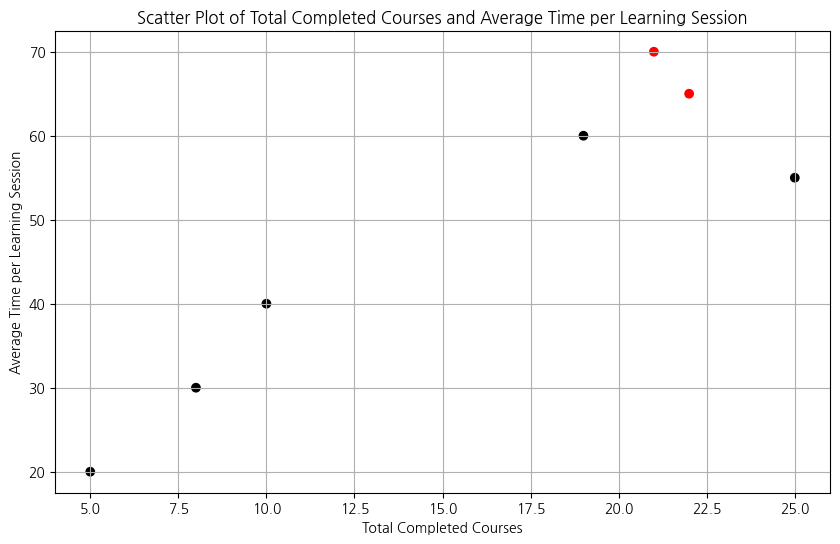

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# 예시 데이터프레임 생성
data = {
    "user_id": ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10'],
    "subscription_duration": [12, 5, 8, 6, 7, 9, 11, 3, 10, 7],
    "recent_login_time": [3, 15, 7, 1, 8, 9, 14, 20, 5, 11],
    "average_login_time": [14, 20, 13, 10, 15, 16, 18, 22, 19, 17],
    "average_time_per_learning_session": [30, 45, 20, 35, 40, 65, 70, 10, 55, 60],
    "monthly_active_learning_days": [12, 15, 10, 9, 13, 14, 16, 5, 11, 10],
    "total_completed_courses": [8, 12, 5, 6, 10, 22, 21, 3, 25, 19],
    "recent_learning_achievement": [75, 80, 70, 65, 77, 85, 82, 60, 90, 78],
    "abandoned_learning_sessions": [2, 1, 3, 0, 2, 4, 2, 5, 3, 2],
    "community_engagement_level": [3, 4, 2, 5, 4, 5, 3, 2, 4, 3],
    "preferred_difficulty_level": ['Low', 'Medium', 'High', 'Low', 'Medium', 'High', 'Medium', 'Low', 'Medium', 'High'],
    "subscription_type": ['Basic', 'Premium', 'Basic', 'Premium', 'Basic', 'Premium', 'Basic', 'Premium', 'Basic', 'Premium'],
    "customer_inquiry_history": [1, 3, 2, 0, 2, 1, 3, 4, 1, 2],
    "payment_pattern": [3, 6, 4, 2, 5, 3, 4, 6, 2, 3],
    "target": [1, 0, 1, 0, 1, 1, 1, 0, 1, 1]
}

access_data = pd.DataFrame(data)

# target=1인 사람들만 필터링
target_data = access_data[access_data['target'] == 1]

# 조건에 따라 색상 지정
colors = target_data.apply(lambda row: 'red' if (20 <= row['total_completed_courses'] <= 25 and row['average_time_per_learning_session'] >= 60) else 'black', axis=1)

# 스캐터 플롯 그리기
plt.figure(figsize=(10, 6))
plt.scatter(target_data['total_completed_courses'], target_data['average_time_per_learning_session'], c=colors)
plt.title('Scatter Plot of Total Completed Courses and Average Time per Learning Session')
plt.xlabel('Total Completed Courses')
plt.ylabel('Average Time per Learning Session')
plt.grid(True)
plt.show()


In [67]:
import pandas as pd

# 주어진 access_data 데이터프레임을 사용합니다
# total_completed_courses 값이 20~25 사이에 속한 사람들만 필터링
filtered_data = access_data[(access_data['total_completed_courses'] >= 20) & (access_data['total_completed_courses'] <= 25)]

# 필터링된 데이터프레임 출력
filtered_data


,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
19,c8d9c81f,6,16,14.571676,5.838557,23,21,73.921745,1,5,Low,Basic,4,0,1
197,64571820,23,9,10.508803,30.015454,7,21,87.955049,3,5,Low,Premium,2,3,0
313,d936f0d2,23,27,9.790072,9.743778,24,25,83.536661,2,5,Low,Premium,2,1,1
337,11146f41,19,9,14.028492,159.390088,18,20,64.763061,2,4,Low,Premium,7,7,1
340,ac1aed05,4,23,14.216883,27.167212,17,22,72.687088,5,5,Medium,Premium,1,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9772,69c46aa4,2,15,16.224639,28.275746,5,21,65.550808,4,4,Medium,Premium,0,6,1
9774,861616d7,4,15,16.220189,19.654111,3,22,49.875266,4,5,Low,Basic,3,0,1
9829,996b9b75,8,17,14.695554,51.196222,16,21,76.485411,3,5,Medium,Premium,6,1,1
9886,58cd99b1,6,5,19.775426,72.925843,10,23,81.277906,3,5,Low,Premium,2,1,0


In [66]:
sorted_data = access_data.sort_values(by='total_completed_courses')

# 정렬된 데이터프레임 출력
sorted_data

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
2137,46a439a2,23,22,11.700542,20.509281,15,1,87.569911,3,5,High,Basic,1,7,0
2403,984a33dd,14,26,13.773047,83.135720,10,2,83.749660,4,5,Medium,Basic,2,6,0
7414,2cb26030,16,2,15.557746,7.828637,20,2,67.688296,2,4,Medium,Basic,3,3,1
1684,9bc5a2f6,8,8,18.411144,23.343520,4,2,70.833770,7,3,Medium,Basic,1,2,1
9009,a1a4f2c0,2,25,14.655783,1.274288,11,2,64.817523,5,4,Medium,Basic,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4045,94486f9f,6,10,12.388863,63.089014,16,26,77.834114,3,5,Low,Premium,1,6,0
5095,01038dd1,3,18,13.450040,28.967534,20,26,75.735315,5,5,Low,Premium,3,1,1
6553,3987397c,4,5,11.364516,36.655687,14,27,74.458882,5,4,Low,Premium,2,7,0
856,2eccda90,23,14,14.305596,14.879921,7,27,56.553429,5,5,Low,Premium,2,3,1


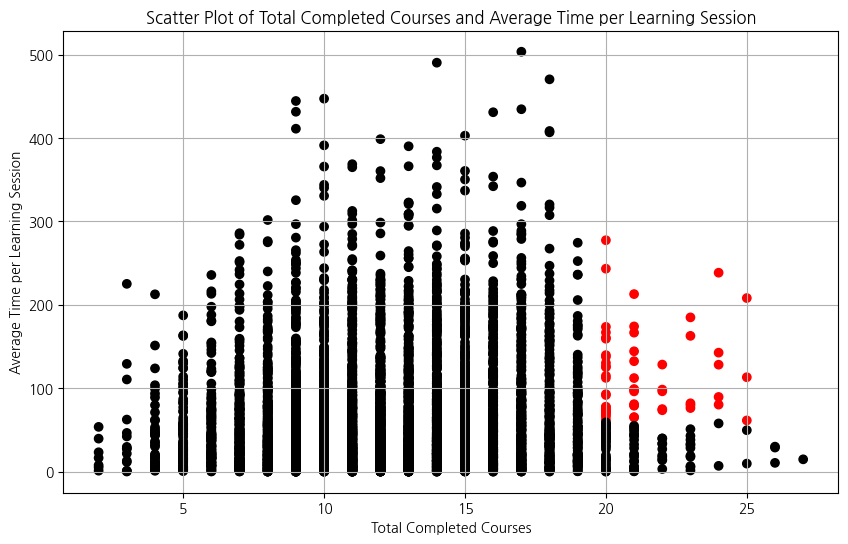

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# 실제 데이터를 로드합니다 (예시로 access_data를 생성했습니다)
# access_data = pd.read_csv('path_to_your_data.csv')

# target=1인 사람들만 필터링
target_data = access_data[access_data['target'] == 1]

# 조건에 따라 색상 지정
colors = target_data.apply(lambda row: 'red' if (20 <= row['total_completed_courses'] <= 25 and row['average_time_per_learning_session'] >= 60) else 'black', axis=1)

# 스캐터 플롯 그리기
plt.figure(figsize=(10, 6))
plt.scatter(target_data['total_completed_courses'], target_data['average_time_per_learning_session'], c=colors)
plt.title('Scatter Plot of Total Completed Courses and Average Time per Learning Session')
plt.xlabel('Total Completed Courses')
plt.ylabel('Average Time per Learning Session')
plt.grid(True)
plt.show()


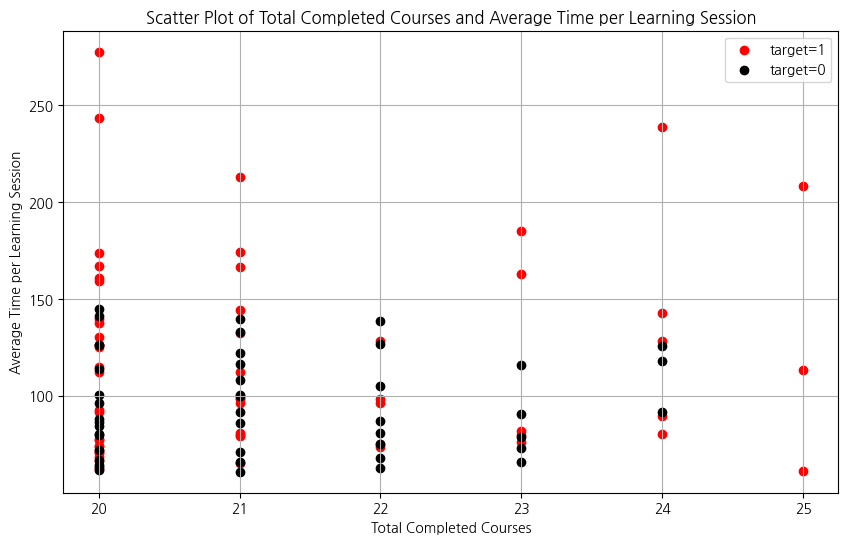

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# 실제 데이터를 로드합니다 (여기서는 access_data를 사용합니다)

# 조건에 맞는 사람들 필터링
condition = (access_data['total_completed_courses'] >= 20) & (access_data['total_completed_courses'] <= 25) & (access_data['average_time_per_learning_session'] >= 60)

# target=1인 사람들
target_1_data = access_data[condition & (access_data['target'] == 1)]

# target=0인 사람들
target_0_data = access_data[condition & (access_data['target'] == 0)]

# 스캐터 플롯 그리기
plt.figure(figsize=(10, 6))

# target=1인 사람들 (빨간색)
plt.scatter(target_1_data['total_completed_courses'], target_1_data['average_time_per_learning_session'], c='red', label='target=1')

# target=0인 사람들 (검정색)
plt.scatter(target_0_data['total_completed_courses'], target_0_data['average_time_per_learning_session'], c='black', label='target=0')

plt.title('Scatter Plot of Total Completed Courses and Average Time per Learning Session')
plt.xlabel('Total Completed Courses')
plt.ylabel('Average Time per Learning Session')
plt.legend()
plt.grid(True)
plt.show()


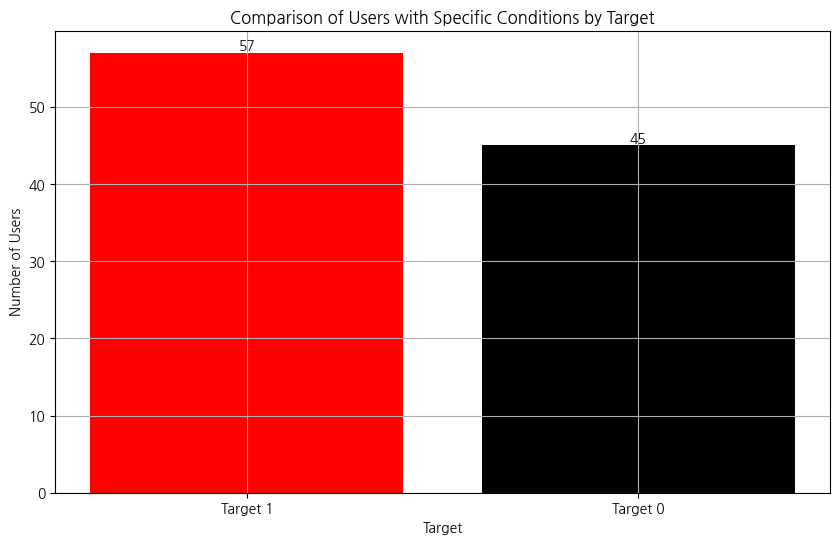

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# 실제 데이터프레임을 사용합니다. 아래는 예시입니다.
# access_data = pd.read_csv('path_to_your_data.csv')

# 조건에 맞는 사람들 필터링
condition = (access_data['total_completed_courses'] >= 20) & (access_data['total_completed_courses'] <= 25) & (access_data['average_time_per_learning_session'] >= 60)

# target=1인 사람들
target_1_data = access_data[condition & (access_data['target'] == 1)]

# target=0인 사람들
target_0_data = access_data[condition & (access_data['target'] == 0)]

# 각 그룹의 수 계산
target_1_count = len(target_1_data)
target_0_count = len(target_0_data)

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
bars = plt.bar(['Target 1', 'Target 0'], [target_1_count, target_0_count], color=['red', 'black'])

# 그래프 제목과 축 라벨 설정
plt.title('Comparison of Users with Specific Conditions by Target')
plt.xlabel('Target')
plt.ylabel('Number of Users')
plt.grid(True)

# 막대에 수치 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom')

# 그래프 보이기
plt.show()


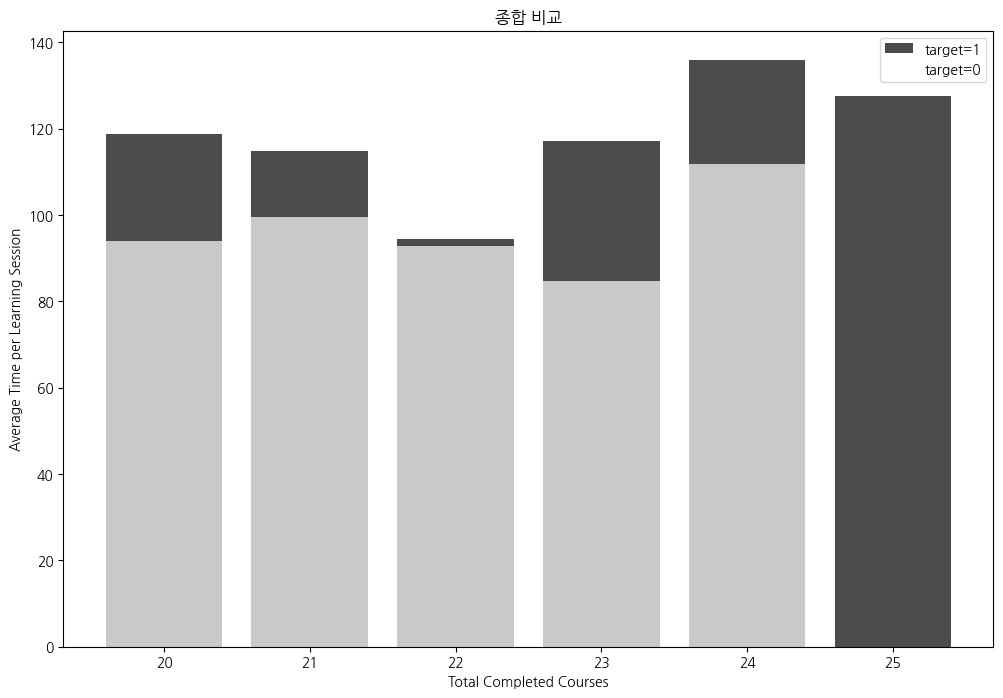

In [74]:
condition = (access_data['total_completed_courses'] >= 20) & (access_data['total_completed_courses'] <= 25) & (access_data['average_time_per_learning_session'] >= 60)

# target=1인 사람들
target_1_data = access_data[condition & (access_data['target'] == 1)]

# target=0인 사람들
target_0_data = access_data[condition & (access_data['target'] == 0)]

# 각 그룹의 평균 계산
target_1_avg = target_1_data.groupby('total_completed_courses')['average_time_per_learning_session'].mean()
target_0_avg = target_0_data.groupby('total_completed_courses')['average_time_per_learning_session'].mean()

# 막대그래프 그리기
plt.figure(figsize=(12, 8))

# target=1인 사람들 (빨간색)
plt.bar(target_1_avg.index.astype(str), target_1_avg, color='black', alpha=0.7, label='target=1')

# target=0인 사람들 (검정색)
plt.bar(target_0_avg.index.astype(str), target_0_avg, color='white', alpha=0.7, label='target=0')

plt.title('종합 비교')
plt.xlabel('Total Completed Courses')
plt.ylabel('Average Time per Learning Session')
plt.legend()
plt.show()